# Lesson 4 Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import automatic_diff as ad

We generate some data by adding a bit of noise to a linear function.  
Least squares regression should be able to recover the parameters of the generating 
linear function.

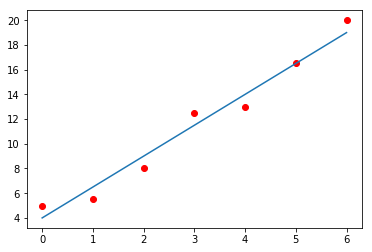

In [2]:
slope = 2.5
intercept = 4
X = [0, 1, 2, 3, 4, 5, 6]
noise = [0.1, -0.1, -0.1, 0.1, -0.1, 0.0, 0.1]
noise_level = 10
y_line = [slope * x + intercept for x in X]
y = [x + noise_level*n for x, n in zip(y_line, noise)]

plt.plot(X, y, 'ro', X, y_line)
plt.show()

In [3]:
model = ad.linear_regression.LinearRegression([[x] for x in X], y, init_params=[0, 1])
params = model.fit(max_iters=5000, tol=1e-8, lr=0.005, verbose=False)

print("Estimated intercept:", params.x[0])
print("Estimated Slope:", params.x[1])

Estimated intercept: 3.785711998669087
Estimated Slope: 2.5714291113267063


Okay, this kind of worked, as it should have found $(intercept, slope) = (4, 2.5)$.   
But even with a large number of iterations, the algorithm is stalling quite a bit before
reaching the real values. 

## Variable Learning Rates

We'll play around a bit with variable learning rates.

In [4]:
model = ad.linear_regression.LinearRegression([[x] for x in X], y, init_params=[0, 1])
lr = ad.learning_rates.TimeDecayLearningRate(lr=0.1, decay_rate=0.1)
params = model.fit(max_iters=5000, tol=1e-8, lr=lr, verbose=False)

print("Estimated intercept:", params.x[0])
print("Estimated Slope:", params.x[1])

Estimated intercept: 3.7470674927099767
Estimated Slope: 2.580551841689951


In [5]:
model = ad.linear_regression.LinearRegression([[x] for x in X], y, init_params=[0, 1])
lr = ad.learning_rates.GradDecayLearningRate(lr=0.1)
params = model.fit(max_iters=1000, tol=1e-4, lr=lr, verbose=False)

print("Estimated intercept:", params.x[0])
print("Estimated Slope:", params.x[1])

Estimated intercept: 3.7828730156324912
Estimated Slope: 2.5720989463975426


In [8]:
model = ad.linear_regression.LinearRegression([[x] for x in X], y, init_params=[0, 1])
lr = ad.learning_rates.MomentumLearningRate(lr=0.1, momentum_rate=0.9)
params = model.fit(max_iters=1000, tol=1e-8, lr=lr, verbose=False)

print("Estimated intercept:", params.x[0])
print("Estimated Slope:", params.x[1])

Estimated intercept: 3.7857143012035803
Estimated Slope: 2.5714286858615747


Huh.  Even with the more sophisticated learning rate schedules, we're not getting any better. 

Admittedly, I have done almost no research on adaptive learning rates, so I'm sure my naive implementations of these leave much room for improvement.